In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#######
from numpy import isnan
from pandas import read_csv



## Méthode 1: Créer une Data Frame

In [5]:

# Créons une Series pour définir des âges
age = pd.Series([23, 22, 25], index=['Etudiant1', 'Etudiant2', 'Etudiant3'])
#age

# et une Series pour définir des tailles
height = pd.Series([155, 175, 168], index=['Etudiant1', 'Etudiant3', 'Etudiant4'])
#height



In [206]:
stat = pd.DataFrame({'age': age, 'height': height})
stat

,age,height
Etudiant1,23.0,155.0
Etudiant2,22.0,NaN
Etudiant3,25.0,175.0
Etudiant4,NaN,168.0


## Méthode 2: Lire une data frame
##Méthode 2.1: Load Dataset from url
##Méthode 2.2: Load Dataset from jupyterLab

In [207]:
## load dataset
#Méthode 2.1
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
stat2 = read_csv(url, header=None, na_values='?')
#Méthode 2.1
#stat3=pd.read_excel('data.xlsx', header=None, na_values='?')
#stat3

## Méthode 3: Créer une data frame

In [208]:
#Etudiant1=np.nan
x=np.nan
df=pd.DataFrame(
{   "Type": ['Etudiant1', 'Etudiant2', 'Etudiant3', 'Etudiant4' ],
   
 "ordre": [2,10, x, 10],  
 "age": [23,x, 25, 0],
 "height": [155, 168, x, 168],
 
}
)
df

,Type,ordre,age,height
0,Etudiant1,2.0,23.0,155.0
1,Etudiant2,10.0,NaN,168.0
2,Etudiant3,NaN,25.0,NaN
3,Etudiant4,10.0,0.0,168.0


## I.Nettoyage de données

## 1.Imputation des données

#### Identifier les valeurs NAN

In [209]:
df.isnull().values.any()


True

In [210]:
df.isnull().sum()

Type      0
ordre     1
age       1
height    1
dtype: int64

In [211]:
df.isnull().sum().sum()

3

In [212]:
df.notnull().values.any()

True

In [213]:
df.notnull().sum().sum()

13

In [214]:
df.isna().sum() 


Type      0
ordre     1
age       1
height    1
dtype: int64

In [215]:
df.isna().sum().sum()

3

In [216]:
df.notna().sum().sum()

13

##  4 techniques pour l'imputation des données
####       * Mean
####       * Median
####       * Most Frequent Value

#### Mean technique

In [217]:
#One of the technique is mean imputation in which the missing values are replaced with the mean value of the entire feature column
df.fillna(df.mean())

,Type,ordre,age,height
0,Etudiant1,2.000000,23.0,155.000000
1,Etudiant2,10.000000,16.0,168.000000
2,Etudiant3,7.333333,25.0,163.666667
3,Etudiant4,10.000000,0.0,168.000000


#### Median Technique

In [218]:
 #Median imputation in which the missing values are replaced with the median value of the entire feature column.
#When the data is skewed, it is good to consider using median value for replacing the missing values.

df.fillna(df.median())

,Type,ordre,age,height
0,Etudiant1,2.0,23.0,155.0
1,Etudiant2,10.0,23.0,168.0
2,Etudiant3,10.0,25.0,168.0
3,Etudiant4,10.0,0.0,168.0


#### Mode technique (most frequent value)

In [219]:

#mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode value for replacing the missing values. For data points such as salary field, 
#you may consider using mode for replacing the values
df['height'] = df['height'].fillna(df['height'].mode()[0])
df


,Type,ordre,age,height
0,Etudiant1,2.0,23.0,155.0
1,Etudiant2,10.0,NaN,168.0
2,Etudiant3,NaN,25.0,168.0
3,Etudiant4,10.0,0.0,168.0


In [220]:
df['ordre'] = df['ordre'].fillna(df['ordre'].mode()[0])
df

,Type,ordre,age,height
0,Etudiant1,2.0,23.0,155.0
1,Etudiant2,10.0,NaN,168.0
2,Etudiant3,10.0,25.0,168.0
3,Etudiant4,10.0,0.0,168.0


## II. Feature Selection

In [1]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
dataframe

NameError: name 'pd' is not defined

#### Convertir l'objet DataFrame en un tableau NumPy pour accélérer le calcul. 
#### De plus, séparer  les feature et les labels.

In [339]:
array = dataframe.values
X1 = array[:,0:8]
Y1 = array[:,8]

In [340]:
X1

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [341]:
Y1

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features, in this case, it is Chi-Squared

In [315]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [328]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
## chi2: Chi-squared stats of non-negative features for classification tasks.
fit = test.fit(X1, Y1)



SelectKBest(k=4, score_func=<function chi2 at 0x0000014DE41A71F0>)

In [332]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [333]:
features = fit.transform(X1)
# Summarize selected features
print(features[0:5,:])
#features[0:5,:]

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


#### Interprétation: 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
Vous pouvez voir les scores pour chaque attribut et les 4 attributs choisis (ceux avec les scores les plus élevés):   test,plas, age, mass. Ces scores vous aideront davantage à déterminer les meilleures features pour entraîner votre modèle.

## III.Data Transformation

## Normalization

In [342]:
import pandas as pd

# data frame containing the odometer reading (km) and the fuel economy (km/l) of second-hand cars
df_cars = pd.DataFrame([[120000, 11], [250000, 11.5], [175000, 15.8], [350000, 17], [400000, 10]],
                       columns=['odometer_reading', 'fuel_economy'])

df_cars

,odometer_reading,fuel_economy
0,120000,11.0
1,250000,11.5
2,175000,15.8
3,350000,17.0
4,400000,10.0


In [343]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_cars_normalized = min_max_scaling(df_cars)

df_cars_normalized

,odometer_reading,fuel_economy
0,0.000000,0.142857
1,0.464286,0.214286
2,0.196429,0.828571
3,0.821429,1.000000
4,1.000000,0.000000


## IV.Feature Engineering

## Extracting features from images

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from skimage.io import imread, imshow

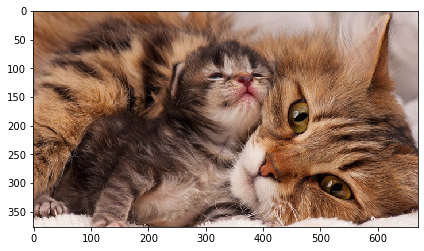

In [14]:
#image1 = imread('C:/Users/Lenovo/Downloads/elephant.jpg')
imageA1=imread('chat1.jpg')
imshow(imageA1);


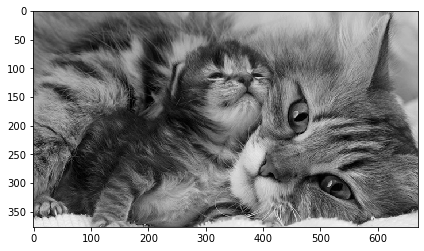

In [15]:
from PIL import Image
#img = Image.open('chat1.jpg').convert('LA')
imageA2 = imread('chat1.jpg', as_gray=True)
imshow(imageA2);
#img.save('greyscale.png')
#img

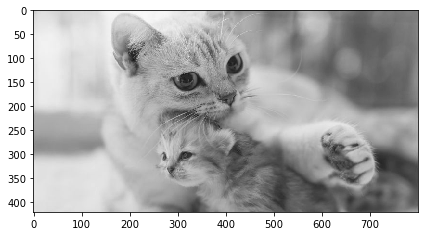

In [16]:
imageB1=imread('chat2.jpg')
#imshow(imageB1);
imageB2 = imread('chat2.jpg', as_gray=True)
imshow(imageB2);

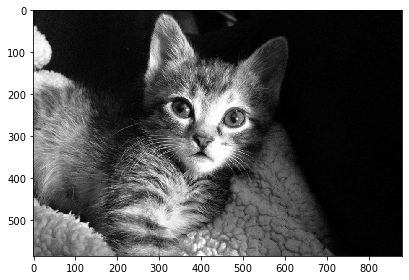

In [17]:
imageC1=imread('chat3.jpg')
#imshow(imageB1);
imageC2 = imread('chat3.jpg', as_gray=True)
imshow(imageC2);

#### Analyse des images

In [18]:
#size of images A

imageA1.size

757770

In [19]:
imageA2.size

252590

In [20]:
np.shape(imageA1)

(377, 670, 3)

In [21]:
np.shape(imageA2)


(377, 670)

#### Extraction de features (variance et écart type)

In [22]:
#Feature 1
#La variance permet de décrire comment les niveaux de gris de l’image sont répartis autour de la moyenne.
v1=np.var(imageA2, axis=(-1, -2))
v2=np.var(imageB2, axis=(-1, -2))
v3=np.var(imageC2, axis=(-1, -2))
print(v1)
print(v2)
print(v3)

0.040793968646101866
0.0368909213547896
0.06986983890610923


In [23]:
#Feature 2
#Ecart type: L'écart type est une mesure de la façon dont les niveaux de gris dans l’image sont répartis.
st1=np.std(imageA2)
print(st1)
st2=np.std(imageB2)
print(st2)
st3=np.std(imageC2)
print(st3)

0.20197516838983418
0.1920700948997256
0.2643290353065838


In [24]:

# Créons une Series pour définir des variances et des écarts type

feature1 = pd.Series([v1, v2, v3], index=['chat1', 'chat2', 'chat3'])
feature2 = pd.Series([st1, st2, st3], index=['chat1', 'chat2', 'chat3'])

ImgFeatures = pd.DataFrame({'Variance': feature1, 'std': feature2})
ImgFeatures

,Variance,std
chat1,0.040794,0.201975
chat2,0.036891,0.192070
chat3,0.069870,0.264329


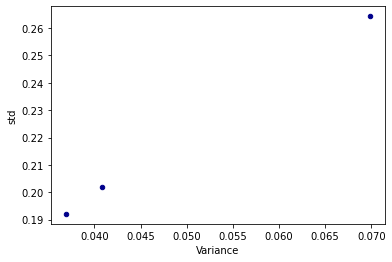

In [25]:
ax1 = ImgFeatures.plot.scatter(x='Variance',
                      y='std',
                      c='DarkBlue')

## V.Réduction de dimension

#### ACP:Méthode1: Calcul manuel

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig


In [73]:
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)



[[1 2]
 [3 4]
 [5 6]]


## Etape 1: Centrage Réduction
###### Le but de cette étape est de standardiser la gamme des variables initiales continues afin que chacune d'elles contribue de manière égale à l'analyse.


###### Mathématiquement, cela peut être fait en soustrayant la moyenne et en divisant par l'écart type pour chaque valeur de chaque variable.

###### Une fois la standardisation terminée, toutes les variables seront transformées à la même échelle.





In [76]:
##Centrage Réduction 

# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
stdA=np.std(A)

# center columns by subtracting column means
C = A - M
CR=C/stdA
print(CR)


[3. 4.]
[[-1.17108009 -1.17108009]
 [ 0.          0.        ]
 [ 1.17108009  1.17108009]]


#### Etape 2: CALCUL DE LA MATRICE DE COVARIANCE

In [77]:
# calculate covariance matrix of centered matrix
V = cov(CR.T)
#print(V)
V

array([[1.37142857, 1.37142857],
       [1.37142857, 1.37142857]])

#### ÉTAPE 3: CALCULER LES VECTEURS PROPRES ET LES VALEURS PROPRES DE LA MATRICE DE COVARIANCE POUR IDENTIFIER LES PRINCIPALES COMPOSANTES

In [78]:
# eigen decomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)


[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[2.74285714 0.        ]


#### Projection des données initiales sur les nouveaux axes (les composantes principales)

In [80]:
# project data
P = vectors.T.dot(CR.T)
print(P.T)


[[-1.65615734  0.        ]
 [ 0.          0.        ]
 [ 1.65615734  0.        ]]


#### ACP:Méthode 2:calcul en utilisant "PCA"

In [81]:

# Principal Component Analysis

from sklearn.decomposition import PCA
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)


[[1 2]
 [3 4]
 [5 6]]


In [82]:
# create the PCA instance
pca = PCA()
# fit on data: Appliquer ACP sur les données
pca.fit(A)


PCA()

In [84]:
# access values and vectors/ 

#Les composantes principales: Vecteurs propores
C=pca.components_
print(C)

#Proportions de variance associées aux axes: les valeurs propores
propvar=pca.explained_variance_
print(propvar)


[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[8.00000000e+00 2.25080839e-33]


In [85]:
# transform data/ Projection
B = pca.transform(A)
print(B)

[[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


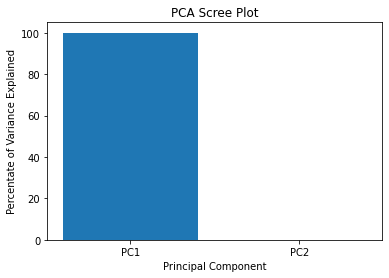

In [86]:
percent_variance = np.round(pca.explained_variance_ratio_* 100)
columns = ['PC1', 'PC2']
plt.bar(x= range(1,3), height=percent_variance, tick_label=columns)
#The x coordinates of the bars.


plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()



In [88]:
# create the PCA instance
pca = PCA(1)
# fit on data: Appliquer ACP sur les données
pca.fit(A)

#Les composantes principales: Vecteurs propores
C=pca.components_
#print(C)

#Proportions de variance associées aux axes: les valeurs propores
propvar=pca.explained_variance_
#print(propvar)

# transform data/ Projection
B = pca.transform(A)
print(B)

[[-2.82842712]
 [ 0.        ]
 [ 2.82842712]]
